In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im 

def D(dose_vector, x=95): return dose_vector[int(len(dose_vector)*x/100)]
def Dmax(dose_vector): return np.max(dose_vector)
def Dmin(dose_vector): return np.min(dose_vector)
def Dmean(dose_vector): return np.mean(dose_vector)
def Dstd(dose_vector): return np.std(dose_vector)
def V(dose_vector, dose=0.95*76): return np.argmax(dose_vector < dose)/len(dose_vector)
def HI(dose_vector, ref=76.0): return (D(dose_vector, x=5)-D(dose_vector, x=95))/ref

In [6]:
import json
f = open('output.json')
dose_vectors = json.load(f)["fmos"]
for i in range(len(dose_vectors)):
    dose_vectors[i] = np.array(dose_vectors[i])
    dose_vectors[i][::-1].sort()
f.close()

def show_dvh(dose_vectors):
    dose_vectors[0][::-1].sort()
    index0 = (np.arange(len(dose_vectors[0]))+1)/len(dose_vectors[0])
    dose_vectors[1][::-1].sort()
    index1 = (np.arange(len(dose_vectors[1]))+1)/len(dose_vectors[1])
    dose_vectors[2][::-1].sort()
    index2 = (np.arange(len(dose_vectors[2]))+1)/len(dose_vectors[2])
    plt.xlabel('dosis')
    plt.ylabel('proporción de voxels')
    plt.plot(dose_vectors[0], index0, '-' , dose_vectors[1], index1, '-' ,dose_vectors[2], index2, '-')
    plt.axvline(x=65, color='r', linestyle='--')
    plt.axvline(x=76, color='r', linestyle='--')
    plt.legend(['organ1', 'organ2', 'tumor'], loc='best')
    plt.show()


          D10(75)    D20(70)    D25(65)    D30(60)    D50(50)    Dmax(77.5)    D20(75)    D30(65)    D50(50)    Dmax(85.8)    D95(76)    D99(69.9)
------  ---------  ---------  ---------  ---------  ---------  ------------  ---------  ---------  ---------  ------------  ---------  -----------
values    79.6121    69.8775    64.8623    60.5861    45.5139       82.6786    72.9094    66.5634    55.7259       84.9263    72.2409      69.3337


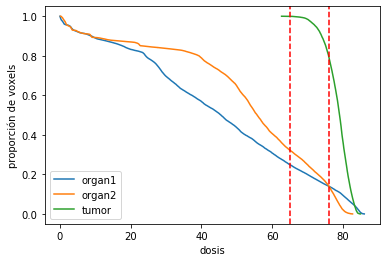

gs: 0.1603377842157574


In [7]:
table = [["values"]]

D10_0 = D(dose_vectors[0],x=10)
D20_0 = D(dose_vectors[0],x=20)
D25_0 = D(dose_vectors[0],x=25)
D30_0 = D(dose_vectors[0],x=30)
D50_0 = D(dose_vectors[0],x=50)
Dmax_1 = Dmax(dose_vectors[1])
D20_1 = D(dose_vectors[1],x=20)
D30_1 = D(dose_vectors[1],x=30)
D50_1 = D(dose_vectors[1],x=50)
Dmax_2 = Dmax(dose_vectors[2])
D95_2 = D(dose_vectors[2],x=95)
D99_2 = D(dose_vectors[2],x=99)

table[0].append(D10_0)
table[0].append(D20_0)
table[0].append(D25_0)
table[0].append(D30_0)
table[0].append(D50_0)
table[0].append(Dmax_1)
table[0].append(D20_1)
table[0].append(D30_1)
table[0].append(D50_1)
table[0].append(Dmax_2)
table[0].append(D95_2)
table[0].append(D99_2)

from tabulate import tabulate
print(tabulate(table, headers=['D10(75)', 'D20(70)', 'D25(65)', 'D30(60)', 'D50(50)', 'Dmax(77.5)', 'D20(75)', 'D30(65)', 'D50(50)', 'Dmax(85.8)','D95(76)', 'D99(69.9)']))

show_dvh(dose_vectors)

gs = 0.05*(np.maximum(D10_0/75,1)) + 0.05*(np.maximum(D20_0/70,1)) + 0.05*(np.maximum(D25_0/65,1)) + 0.05*(np.maximum(D30_0/60,1)) + 0.05*(np.maximum(D50_0/50,1)) + \
    0.0825*(np.maximum(Dmax_1/77.5,1)) + 0.0825*(np.maximum(D20_1/75,1)) + 0.0825*(np.maximum(D30_1/65,1)) + 0.0825*(np.maximum(D50_1/50,1)) + 0.05*(np.maximum(D50_0/50,1)) + \
    0.1666*(np.maximum(76/D95_2,1)) + 0.1666*(np.maximum(69.9/D99_2,1)) + 0.1666*(np.maximum(Dmax_2/85.8,1))-1
print("gs:",gs)